In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Best datset_model perspective_AUC/Data/lucene-3.1.csv')
data = data.drop('File', axis=1)
X = data.iloc[:,0:]  #independent columns
y = data.iloc[:,-1]    #target column i.e Realbug
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

               Specs         Score
48     CountPath_Max  6.814585e+10
49    CountPath_Mean  7.317042e+09
58         Del_lines  5.616917e+05
57       Added_lines  2.064953e+05
2          CountLine  1.895193e+05
31         CountStmt  1.124913e+05
27     CountLineCode  1.118585e+05
23  CountLineCodeExe  9.716616e+04
33    CountSemicolon  9.117785e+04
28      CountStmtExe  9.090058e+04


In [2]:
## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

train_dataset = pd.read_csv(('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Best datset_model perspective_AUC/Data/lucene-2.9.0.csv'), index_col = 'File')
test_dataset = pd.read_csv(('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Best datset_model perspective_AUC/Data/lucene-3.1.csv'), index_col = 'File')

outcome = 'RealBug'
features = ['CountPath_Max', 'CountPath_Mean', 'Del_lines', 'Added_lines', 'CountLine', 'CountStmt', 'CountLineCode']
# commits - # of commits that modify the file of interest
# Added lines - # of added lines of code
# Count class coupled - # of classes that interact or couple with the class of interest
# LOC - # of lines of code
# RatioCommentToCode - The ratio of lines of comments to lines of code

# process outcome to 0 and 1
train_dataset[outcome] = pd.Categorical(train_dataset[outcome])
train_dataset[outcome] = train_dataset[outcome].cat.codes

test_dataset[outcome] = pd.Categorical(test_dataset[outcome])
test_dataset[outcome] = test_dataset[outcome].cat.codes

X_train = train_dataset.loc[:, features]
X_test = test_dataset.loc[:, features]

y_train = train_dataset.loc[:, outcome]
y_test = test_dataset.loc[:, outcome]

class_labels = ['Clean', 'Defective']

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

In [3]:
test_dataset

CountDeclMethodPrivate  \
File                                                                         
lucene/backwards/src/test/org/apache/lucene/ana...                       0   
lucene/backwards/src/test/org/apache/lucene/ana...                       0   
lucene/backwards/src/test/org/apache/lucene/ana...                       0   
lucene/backwards/src/test/org/apache/lucene/ana...                       1   
lucene/backwards/src/test/org/apache/lucene/ana...                       0   
...                                                                    ...   
solr/src/webapp/src/org/apache/solr/servlet/Sol...                       2   
solr/src/webapp/src/org/apache/solr/servlet/Sol...                       0   
solr/src/webapp/src/org/apache/solr/servlet/Sol...                       0   
solr/src/webapp/src/org/apache/solr/servlet/Sol...                       0   
solr/src/webapp/src/org/apache/solr/servlet/Sol...                       0   

                                                    AvgLineCode  CountLine  \
File                                                                         
lucene/backwards/src/test/org/apache/lucene/ana...            4        170   
lucene/backwards/src/test/org/apache/lucene/ana...            9        163   
lucene/backwards/src/test/org/apache/lucene/ana...          528       1906   
lucene/backwards/src/test/org/apache/lucene/ana...           21        110   
lucene/backwards/src/test/org/apache/lucene/ana...           21        180   
...                                                         ...        ...   
solr/src/webapp/src/org/apache/solr/servlet/Sol...           21        414   
solr/src/webapp/src/org/apache/solr/servlet/Sol...           11        413   
solr/src/webapp/src/org/apache/solr/servlet/Sol...           17        150   
solr/src/webapp/src/org/apache/solr/servlet/Sol...            3         33   
solr/src/webapp/src/org/apache/solr/servlet/Sol...           13         90   

                                                    MaxCyclomatic  \
File                                                                
lucene/backwards/src/test/org/apache/lucene/ana...             12   
lucene/backwards/src/test/org/apache/lucene/ana...              3   
lucene/backwards/src/test/org/apache/lucene/ana...              5   
lucene/backwards/src/test/org/apache/lucene/ana...              2   
lucene/backwards/src/test/org/apache/lucene/ana...             10   
...                                                           ...   
solr/src/webapp/src/org/apache/solr/servlet/Sol...             25   
solr/src/webapp/src/org/apache/solr/servlet/Sol...             13   
solr/src/webapp/src/org/apache/solr/servlet/Sol...             11   
solr/src/webapp/src/org/apache/solr/servlet/Sol...              1   
solr/src/webapp/src/org/apache/solr/servlet/Sol...              3   

                                                    CountDeclMethodDefault  \
File                                                                         
lucene/backwards/src/test/org/apache/lucene/ana...                       0   
lucene/backwards/src/test/org/apache/lucene/ana...                       1   
lucene/backwards/src/test/org/apache/lucene/ana...                       1   
lucene/backwards/src/test/org/apache/lucene/ana...                       0   
lucene/backwards/src/test/org/apache/lucene/ana...                       0   
...                                                                    ...   
solr/src/webapp/src/org/apache/solr/servlet/Sol...                       0   
solr/src/webapp/src/org/apache/solr/servlet/Sol...                       1   
solr/src/webapp/src/org/apache/solr/servlet/Sol...                       1   
solr/src/webapp/src/org/apache/solr/servlet/Sol...                       0   
solr/src/webapp/src/org/apache/solr/servlet/Sol...                       0   

                                                    AvgEssential  \
File                                     

In [4]:
from sklearn.ensemble import RandomForestClassifier
our_rf_model = RandomForestClassifier(random_state=0)
our_rf_model.fit(X_train, y_train)  

RandomForestClassifier(random_state=0)

In [5]:
y_test.value_counts()

0    2699
1     107
Name: RealBug, dtype: int64

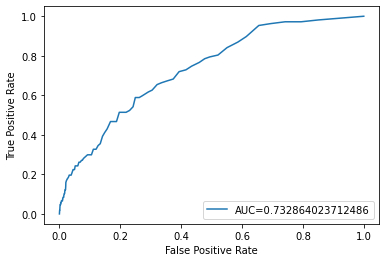

In [6]:
from sklearn import metrics
from matplotlib import pyplot as plt
y_pred_proba = our_rf_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## LIME

In [7]:
# Import for LIME
import lime
import lime.lime_tabular

file_to_be_explained = 'lucene/contrib/queryparser/src/java/org/apache/lucene/queryParser/standard/parser/StandardSyntaxParser.java'

print(f'Explaining {file_to_be_explained} with LIME')

Explaining lucene/contrib/queryparser/src/java/org/apache/lucene/queryParser/standard/parser/StandardSyntaxParser.java with LIME


In [8]:
# LIME Step 1 - Construct an explainer
our_lime_explainer = lime.lime_tabular.LimeTabularExplainer(
                            training_data = X_train.values,  
                            mode = 'classification',
                            training_labels = y_train,
                            feature_names = features,
                            class_names = class_labels,
                            discretize_continuous = True)
                            
# LIME Step 2 - Use the constructed explainer with the predict function 
# of your predictive model to explain any instance
lime_local_explanation_of_an_instance = our_lime_explainer.explain_instance(
                           # X_test[0],
                          # data_row = X_test.loc['FileName.py', : ], 
                            data_row = X_test.loc[file_to_be_explained, : ],
                            predict_fn = our_rf_model.predict_proba, 
                            num_features = 7,
                            top_labels = 1)

#explainer = lime_tabular.LimeTabularExplainer(X_train, mode = "regression", feature_names = boston_housing.feature_names)
#explanation = explainer.explain_instance(X_test[0], model.predict, num_features = len(boston_housing.feature_names))
                            
# Please use the code below to visualise the generated LIME explanation.
lime_local_explanation_of_an_instance.show_in_notebook()

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [49]:
lime_local_explanation_of_an_instance.as_map()

{0: [(2, 0.11749498828341162),
  (3, 0.10734741091369437),
  (0, -0.09418945108887435),
  (1, -0.08336010351104799),
  (4, 0.030442442328983094)]}

In [66]:
X_test.loc[file_to_be_explained,:]

CountPath_Max     1032.000000
CountPath_Mean      47.863636
Del_lines            0.000000
Added_lines          0.000000
CountLine          170.000000
Name: lucene/backwards/src/test/org/apache/lucene/analysis/BaseTokenStreamTestCase.java, dtype: float64

In [71]:
test_indx_list = X_test.index.tolist()
test_dict={}
for n in test_indx_list:
    exp = our_lime_explainer.explain_instance(X_test.loc[n].values, our_rf_model.predict_proba, num_features=5, top_labels = 1, num_samples = 2500)
    a=exp.as_map()
    test_dict[n] = a
test_dict

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

{'lucene/backwards/src/test/org/apache/lucene/analysis/BaseTokenStreamTestCase.java': {1: [(2,
    -0.12455121009290086),
   (3, -0.1052150526803893),
   (0, 0.10268060202920508),
   (1, 0.09367948073886603),
   (4, -0.01929880874555935)]},
 'lucene/backwards/src/test/org/apache/lucene/analysis/TestAnalyzers.java': {1: [(2,
    -0.11876996782339574),
   (3, -0.09986553109122352),
   (0, -0.03993522584701883),
   (4, -0.033589787882596284),
   (1, -0.028305605941246658)]},
 'lucene/backwards/src/test/org/apache/lucene/analysis/TestASCIIFoldingFilter.java': {1: [(4,
    0.22170100315365862),
   (2, -0.12381113057685943),
   (3, -0.11060747873238033),
   (1, 0.0806082393308222),
   (0, 0.07871489277589463)]},
 'lucene/backwards/src/test/org/apache/lucene/analysis/TestCachingTokenFilter.java': {1: [(2,
    -0.1256424018293089),
   (3, -0.09427869990934809),
   (4, -0.08606054836840266),
   (0, -0.04113699506858217),
   (1, -0.02635064753074458)]},
 'lucene/backwards/src/test/org/apache/luc

In [74]:
test_indx_list = X_test.index.tolist()
test_dict={}
for n in test_indx_list:
    exp = our_lime_explainer.explain_instance(X_test.loc[n].values, our_rf_model.predict_proba, num_features=5, top_labels = 1, num_samples = 2500)
    a=exp.as_map()
    test_dict[n] = a
test_dict

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

{'lucene/backwards/src/test/org/apache/lucene/analysis/BaseTokenStreamTestCase.java': {0: [(2,
    0.1195612355528048),
   (3, 0.10560691591875318),
   (0, -0.09313908782940493),
   (1, -0.08143452216500278),
   (4, 0.03720452019672879)]},
 'lucene/backwards/src/test/org/apache/lucene/analysis/TestAnalyzers.java': {0: [(2,
    0.1076655479464707),
   (3, 0.10548050864153109),
   (4, 0.04175580041732668),
   (0, 0.029270873265801838),
   (1, 0.01881109725306437)]},
 'lucene/backwards/src/test/org/apache/lucene/analysis/TestASCIIFoldingFilter.java': {0: [(4,
    -0.23316217137561837),
   (2, 0.12312643757324024),
   (3, 0.10312225837583336),
   (0, -0.0941196662330616),
   (1, -0.07489466442226912)]},
 'lucene/backwards/src/test/org/apache/lucene/analysis/TestCachingTokenFilter.java': {0: [(2,
    0.1139985642080217),
   (3, 0.10709290287494042),
   (4, 0.070805282751282),
   (0, 0.04121070129186661),
   (1, 0.03685262555888134)]},
 'lucene/backwards/src/test/org/apache/lucene/analysis/T

In [95]:
import csv
with open("file.csv", "w", newline="") as fp:
    # Create a writer object
    writer = csv.DictWriter(fp, fieldnames=test_dict.keys())

    # Write the header row
    writer.writeheader()

    # Write the data rows
    writer.writerow(test_dict)
    print('Done writing dict to a csv file')

Done writing dict to a csv file


In [96]:
import pandas as pd
import ast
df = pd.read_csv("file.csv")
columns = df.columns.values.tolist()
val_cal_0 = {"0": 0, "1": 0, "2": 0, "3": 0, "4": 0}
val_cal_1 = {"0": 0, "1": 0, "2": 0, "3": 0, "4": 0}
val_cal_count_0 = {"0": 0, "1": 0, "2": 0, "3": 0, "4": 0}
val_cal_count_1 = {"0": 0, "1": 0, "2": 0, "3": 0, "4": 0}
for col in columns:
#     print(df[col].values.tolist()[0])
    val = ast.literal_eval(df[col].values.tolist()[0])
    if 0 in val.keys():
        dict_val = val[0]
        for i in dict_val:
            index = str(i[0])
            value = i[1]
            val_cal_0[index] += value
            val_cal_count_0[index] +=1
    else:
        dict_val = val[1]
        for i in dict_val:
            index = str(i[0])
            value = i[1]
            val_cal_1[index] += value
            val_cal_count_1[index] +=1
print(val_cal_0)
print(val_cal_count_0)
print(val_cal_1)
print(val_cal_count_1)

{'0': 5.088484645726477, '1': 1.8371661556059797, '2': 86.9433132662648, '3': 203.98715766671484, '4': 44.374170392790056}
{'0': 2607, '1': 2607, '2': 2607, '3': 2607, '4': 2607}
{'0': 7.197018125243167, '1': 5.580436650460818, '2': 11.124735917231188, '3': 5.163721513522769, '4': 32.47894199030552}
{'0': 199, '1': 199, '2': 199, '3': 199, '4': 199}


In [97]:
print("For defective: ")
for i in val_cal_0.keys():
    print("for {}: average is {}".format(i, (val_cal_0[i]/val_cal_count_0[i])))

For defective: 
for 0: average is 0.001951854486277897
for 1: average is 0.000704705084620629
for 2: average is 0.03334994755130986
for 3: average is 0.07824593696460101
for 4: average is 0.017021162406133508


In [98]:
print("For clean: ")
for i in val_cal_1.keys():
    print("for {}: average is {}".format(i, (val_cal_1[i]/val_cal_count_1[i])))

For clean: 
for 0: average is 0.0361659202273526
for 1: average is 0.028042395228446322
for 2: average is 0.05590319556397582
for 3: average is 0.025948349314184768
for 4: average is 0.16321076377037952


In [61]:
# LIME Step 1 - Construct an explainer
our_lime_explainer = lime.lime_tabular.LimeTabularExplainer(
                            training_data = X_train.values,  
                            mode = 'classification',
                            training_labels = y_train,
                            feature_names = features,
                            class_names = class_labels,
                            discretize_continuous = True)
                            
# LIME Step 2 - Use the constructed explainer with the predict function 
# of your predictive model to explain any instance
lime_local_explanation_of_an_instance = our_lime_explainer.explain_instance(
                           # X_test[0],
                          # data_row = X_test.loc['FileName.py', : ], 
                            data_row = X_test.loc[[], : ],
                            predict_fn = our_rf_model.predict_proba, 
                            num_features = 5,
                            top_labels = 1)

#explainer = lime_tabular.LimeTabularExplainer(X_train, mode = "regression", feature_names = boston_housing.feature_names)
#explanation = explainer.explain_instance(X_test[0], model.predict, num_features = len(boston_housing.feature_names))
                            
# Please use the code below to visualise the generated LIME explanation.
lime_local_explanation_of_an_instance.show_in_notebook()

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


## SHAP

In [10]:
# Import libraries for SHAP
import subprocess
import sys
import importlib
import numpy
import shap

file_to_be_explained = 'lucene/backwards/src/test/org/apache/lucene/analysis/BaseTokenStreamTestCase.java'
file_to_be_explained_idx = list(X_test.index).index(file_to_be_explained)

In [11]:
# explainer = shap.Explainer(our_rf_model, numpy.ascontiguousarray(X_train))
# shap_values = explainer(numpy.ascontiguousarray(X_test))

explainer = shap.Explainer(our_rf_model)
shap_values = explainer(X_test)

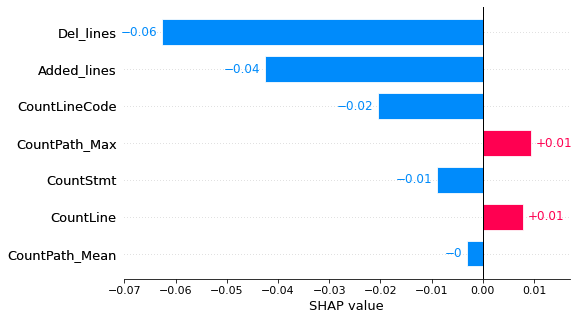

In [12]:
import matplotlib.pyplot as plt
shap.plots.bar(shap_values[file_to_be_explained_idx, :, 1], show=True)

## BreakDown

In [13]:
## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

train_dataset = pd.read_csv(('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Best datset_model perspective_AUC/Data/lucene-2.9.0.csv'), index_col = 'File')
test_dataset = pd.read_csv(('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Best datset_model perspective_AUC/Data/lucene-3.1.csv'), index_col = 'File')

outcome = 'RealBug'
features = ['CountPath_Max', 'CountPath_Mean', 'Del_lines', 'Added_lines', 'CountLine', 'CountStmt', 'CountLineCode']
# commits - # of commits that modify the file of interest
# Added lines - # of added lines of code
# Count class coupled - # of classes that interact or couple with the class of interest
# LOC - # of lines of code
# RatioCommentToCode - The ratio of lines of comments to lines of code

# process outcome to 0 and 1
train_dataset[outcome] = pd.Categorical(train_dataset[outcome])
train_dataset[outcome] = train_dataset[outcome].cat.codes

test_dataset[outcome] = pd.Categorical(test_dataset[outcome])
test_dataset[outcome] = test_dataset[outcome].cat.codes

X_train = train_dataset.loc[:, features]
X_test = test_dataset.loc[:, features]

y_train = train_dataset.loc[:, outcome]
y_test = test_dataset.loc[:, outcome]

class_labels = ['Clean', 'Defective']

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

In [14]:
from sklearn.ensemble import RandomForestClassifier
our_rf_model = RandomForestClassifier(random_state=0)
our_rf_model.fit(X_train, y_train) 

RandomForestClassifier(random_state=0)

In [15]:
#necessary imports
from pyBreakDown.explainer import Explainer
from pyBreakDown.explanation import Explanation
#make explainer object
exp = Explainer(clf=our_rf_model, data= X_train, colnames=features)

In [16]:
#make explanation object that contains all information

explanation = exp.explain(observation=X_train.iloc[0,:].values,direction="up",useIntercept=True)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

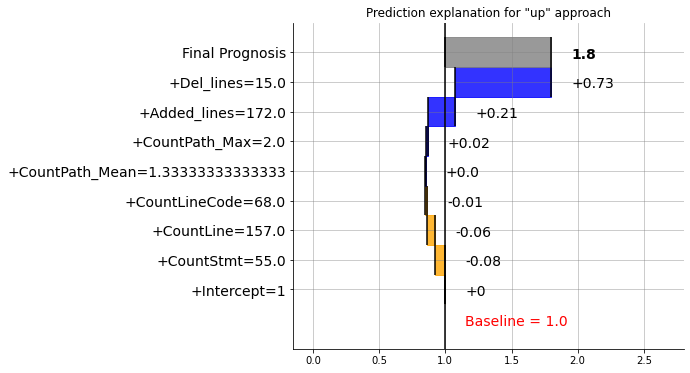

In [17]:
explanation.visualize()

## PyExplainer

In [18]:
## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

train_dataset = pd.read_csv(('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Best datset_model perspective_AUC/Data/lucene-2.9.0.csv'), index_col = 'File')
test_dataset = pd.read_csv(('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Best datset_model perspective_AUC/Data/lucene-3.1.csv'), index_col = 'File')

outcome = 'RealBug'
features = ['CountPath_Max', 'CountPath_Mean', 'Del_lines', 'Added_lines', 'CountLine', 'CountStmt', 'CountLineCode']
# OWN_COMMIT - # code ownership
# Added lines - # of added lines of code
# Count class coupled - # of classes that interact or couple with the class of interest
# RatioCommentToCode - The ratio of lines of comments to lines of code

# process outcome to 0 and 1
train_dataset[outcome] = pd.Categorical(train_dataset[outcome])
train_dataset[outcome] = train_dataset[outcome].cat.codes

test_dataset[outcome] = pd.Categorical(test_dataset[outcome])
test_dataset[outcome] = test_dataset[outcome].cat.codes

X_train = train_dataset.loc[:, features]
X_test = test_dataset.loc[:, features]

y_train = train_dataset.loc[:, outcome]
y_test = test_dataset.loc[:, outcome]


class_labels = ['Clean', 'Defective']

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)  

RandomForestClassifier(random_state=0)

In [20]:
from pyexplainer.pyexplainer_pyexplainer import PyExplainer
file_to_be_explained = 'lucene/backwards/src/test/org/apache/lucene/analysis/BaseTokenStreamTestCase.java'
import numpy as np
np.random.seed(0)

pyexp = PyExplainer(X_train = X_train,
                           y_train = y_train,
                           indep = X_train.columns,
                           dep = outcome,
                           top_k_rules=5,
                           blackbox_model = rf_model)

# PyExplainer Step 2 - Generate the rule-based explanation of an instance to be explained
exp_obj = pyexp.explain(X_explain = X_test.loc[file_to_be_explained,:].to_frame().transpose(),
                        y_explain = pd.Series(bool(y_test.loc[file_to_be_explained]), 
                                                      index = [file_to_be_explained],
                                                      name = outcome),
                        search_function = 'crossoverinterpolation',
                        max_iter=1000,
                        max_rules=20,
                        random_state=0,
                        reuse_local_model=True)

# Print rule 
exp_obj['top_k_positive_rules'][:1]

# Please use the code below to visualise the generated PyExplainer explanation (What-If interactive visualisation).
pyexp.visualise(exp_obj, title="Why this file is predicted as defect-introducing?")


Output(layout=Layout(border='3px solid black'))

FloatSlider(value=47.86, continuous_update=False, description='#1 The value of CountPath_Mean is more than 47.…

## PDP

In [21]:
## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

train_dataset = pd.read_csv(('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Best datset_model perspective_AUC/Data/lucene-2.9.0.csv'), index_col = 'File')
test_dataset = pd.read_csv(('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Best datset_model perspective_AUC/Data/lucene-3.1.csv'), index_col = 'File')


#outcome = 'RealBug'
#features = ['MAJOR_COMMIT', 'ADEV', 'COMM', 'OWN_COMMIT', 'CountClassCoupled', 'HeuBugCount', 'DDEV', 'HeuBug', 'HeuBugCount']
outcome = 'RealBug'
features = ['CountPath_Max', 'CountPath_Mean', 'Del_lines', 'Added_lines', 'CountLine', 'CountStmt', 'CountLineCode']
# commits - # of commits that modify the file of interest
# Added lines - # of added lines of code
# Count class coupled - # of classes that interact or couple with the class of interest
# LOC - # of lines of code
# RatioCommentToCode - The ratio of lines of comments to lines of code

# process outcome to 0 and 1
train_dataset[outcome] = pd.Categorical(train_dataset[outcome])
train_dataset[outcome] = train_dataset[outcome].cat.codes

test_dataset[outcome] = pd.Categorical(test_dataset[outcome])
test_dataset[outcome] = test_dataset[outcome].cat.codes

X_train = train_dataset.loc[:, features]
X_test = test_dataset.loc[:, features]

y_train = train_dataset.loc[:, outcome]
y_test = test_dataset.loc[:, outcome]

class_labels = ['Clean', 'Defective']

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

In [22]:
from sklearn.ensemble import RandomForestClassifier
our_rf_model = RandomForestClassifier(random_state=0)
our_rf_model.fit(X_train, y_train)  

RandomForestClassifier(random_state=0)

In [23]:
import numpy as np
import pandas as pd
# sklearn version: v1.0.1
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.inspection import (partial_dependence, 
                                PartialDependenceDisplay)
import matplotlib.pyplot as plt
import seaborn as sns


file_to_be_explained = 'lucene/backwards/src/test/org/apache/lucene/analysis/BaseTokenStreamTestCase.java'

print(f'Explaining {file_to_be_explained} with PDP')

Explaining lucene/backwards/src/test/org/apache/lucene/analysis/BaseTokenStreamTestCase.java with PDP


## Average Value of CountPath_Max

In [24]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [0], kind = 'average')

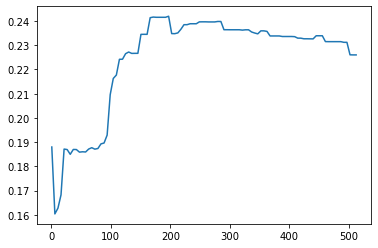

In [25]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of CountPath_Mean

In [26]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [1], kind = 'average')

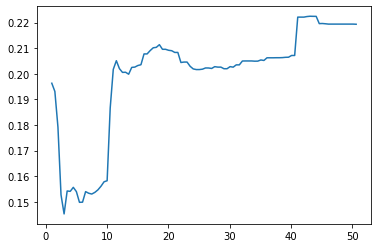

In [27]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of Del_lines

In [28]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [2], kind = 'average')

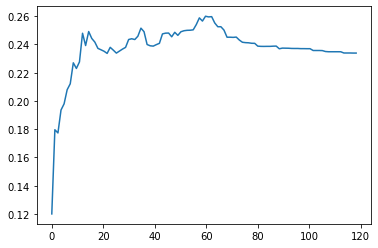

In [29]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of Added_lines

In [30]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [3], kind = 'average')

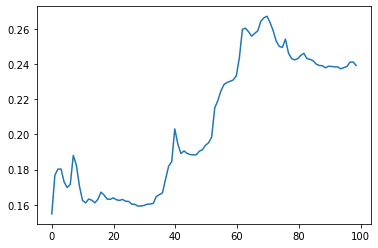

In [31]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of CountLine

In [34]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [4], kind = 'average')

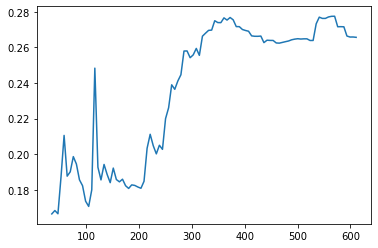

In [35]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of CountStmt

In [37]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [5], kind = 'average')

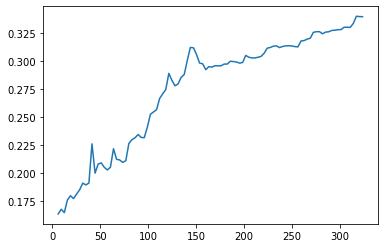

In [38]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of CountLineCode

In [39]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [6], kind = 'average')

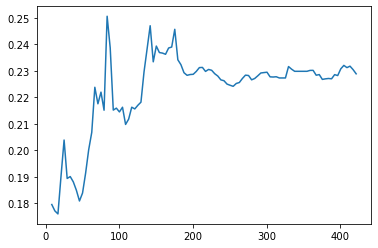

In [40]:
plt.plot(results['values'][0], results['average'][0])

## ICE

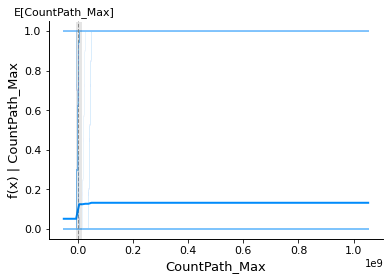

In [35]:
import subprocess
import sys
import importlib
import numpy
import shap

shap.plots.partial_dependence(
    "CountPath_Max", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

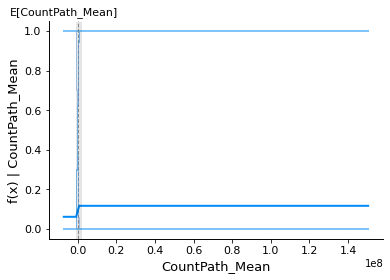

In [36]:
shap.plots.partial_dependence(
    "CountPath_Mean", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

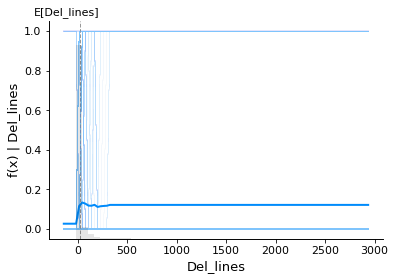

In [37]:
shap.plots.partial_dependence(
    "Del_lines", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

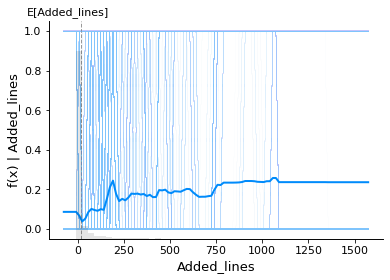

In [38]:
shap.plots.partial_dependence(
    "Added_lines", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

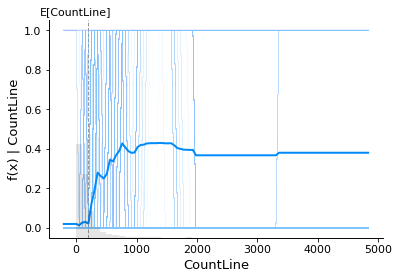

In [39]:
shap.plots.partial_dependence(
    "CountLine", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

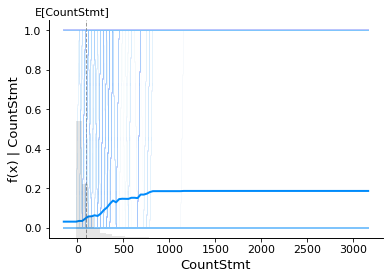

In [41]:
shap.plots.partial_dependence(
    "CountStmt", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

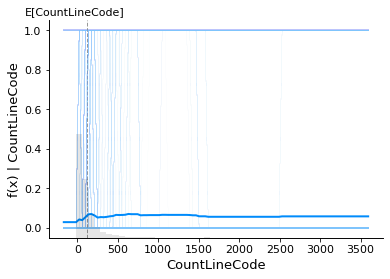

In [42]:
shap.plots.partial_dependence(
    "CountLineCode", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

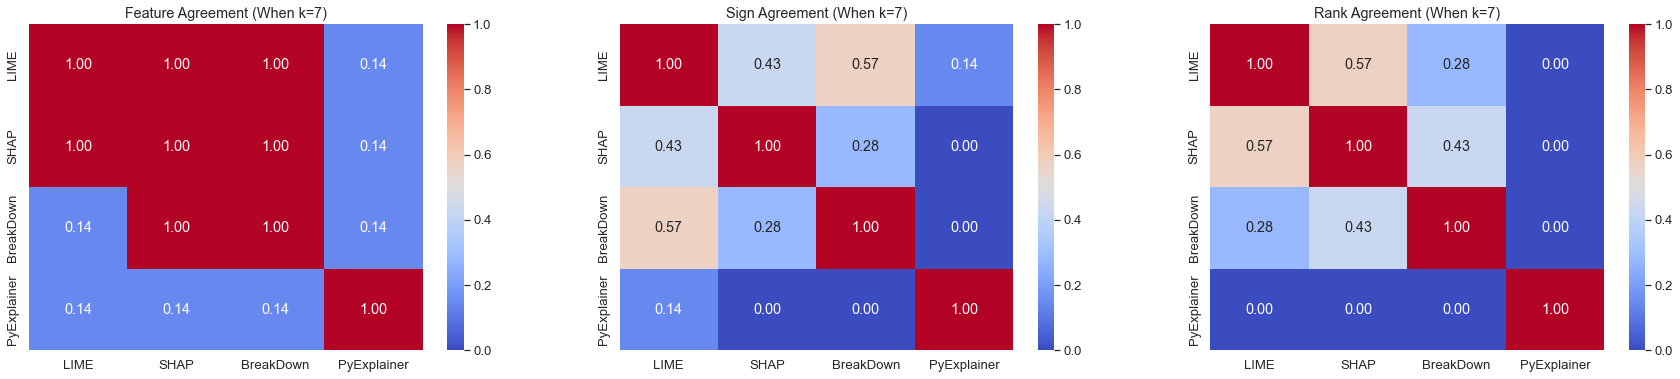

In [47]:
import seaborn as sns
import pandas as pd

data1 = pd.read_csv("/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Feature Engineering_Explainer implemetation/k=7/k7Chi_Feature Agreement.csv", index_col=0)
data2 = pd.read_csv("/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Feature Engineering_Explainer implemetation/k=7/k7Chi_Sign Agreement.csv", index_col=0)
data3 = pd.read_csv("/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/Feature Engineering_Explainer implemetation/k=7/k7Chi_Rank Agreement.csv", index_col=0)


fig, ax = plt.subplots(1,3, figsize=(30, 6))


sns.set(font_scale=1.2)
sns.heatmap(data1, cmap="coolwarm", annot=True, fmt=".2f", vmin=0, vmax=1, ax= ax[0])
ax[0].title.set_text("Feature Agreement (When k=7)")

sns.heatmap(data2, cmap="coolwarm", annot=True, fmt=".2f", vmin=0, vmax=1, ax= ax[1])
ax[1].title.set_text("Sign Agreement (When k=7)")

sns.heatmap(data3, cmap="coolwarm", annot=True, fmt=".2f", vmin=0, vmax=1, ax= ax[2])
ax[2].title.set_text("Rank Agreement (When k=7)")


plt.show()